## 1 Configuración Entorno

In [1]:
# Configuración de warnings y opciones de visualización
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Configuración de estilo
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')

## 2 Carga de Datos

In [2]:
import pandas as pd
import numpy as np
import os

# Cargar el dataset
df = pd.read_csv('../data/raw/youtube_hate_speech_dataset.csv')

# Vista preliminar
print(f"Dimensiones del dataset: {df.shape}")
df.head()

# Información de tipos de datos
df.info()

# Estadísticas básicas
df.describe(include='all')

Dimensiones del dataset: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,UgjBJKQSoQMQ6ngCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


## 3. Exploración Inicial del Dataset

Valores nulos por columna:
Número de videos únicos: 13
Media de comentarios por video: 76.92
Máximo de comentarios por video: 274


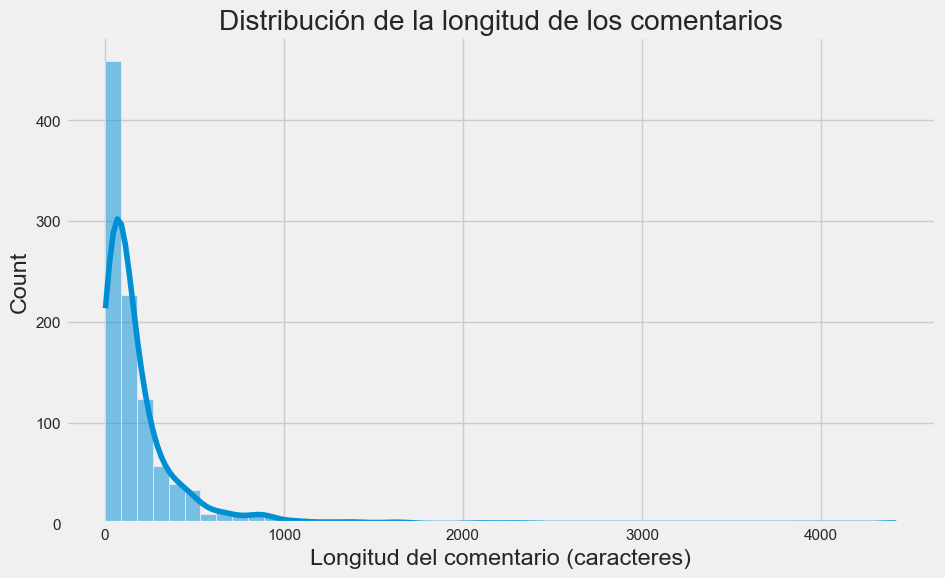

count    1000.000000
mean      185.554000
std       270.780777
min         3.000000
25%        47.000000
50%       101.000000
75%       217.000000
max      4421.000000
Name: text_length, dtype: float64

In [3]:
# Verificar valores nulos
print("Valores nulos por columna:")
df.isnull().sum()

# Explorar distribución de comentarios por video
video_counts = df['VideoId'].value_counts()
print(f"Número de videos únicos: {len(video_counts)}")
print(f"Media de comentarios por video: {video_counts.mean():.2f}")
print(f"Máximo de comentarios por video: {video_counts.max()}")

# Explorar longitud de los comentarios
df['text_length'] = df['Text'].str.len()
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, ax=ax)
ax.set_title('Distribución de la longitud de los comentarios')
ax.set_xlabel('Longitud del comentario (caracteres)')
plt.show()

# Estadísticas de longitud
df['text_length'].describe()

## 4. Análisis de Distribución de Etiquetas

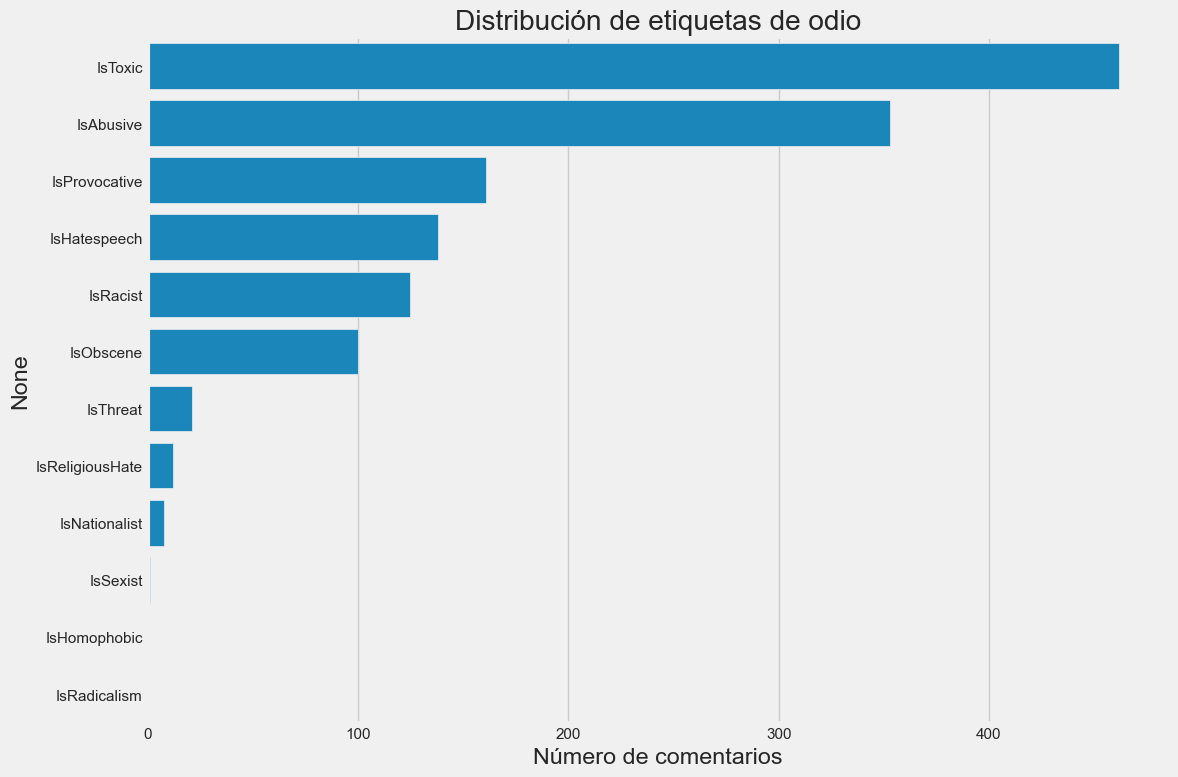

Porcentaje de comentarios por categoría:
IsToxic: 46.20%
IsAbusive: 35.30%
IsProvocative: 16.10%
IsHatespeech: 13.80%
IsRacist: 12.50%
IsObscene: 10.00%
IsThreat: 2.10%
IsReligiousHate: 1.20%
IsNationalist: 0.80%
IsSexist: 0.10%
IsHomophobic: 0.00%
IsRadicalism: 0.00%


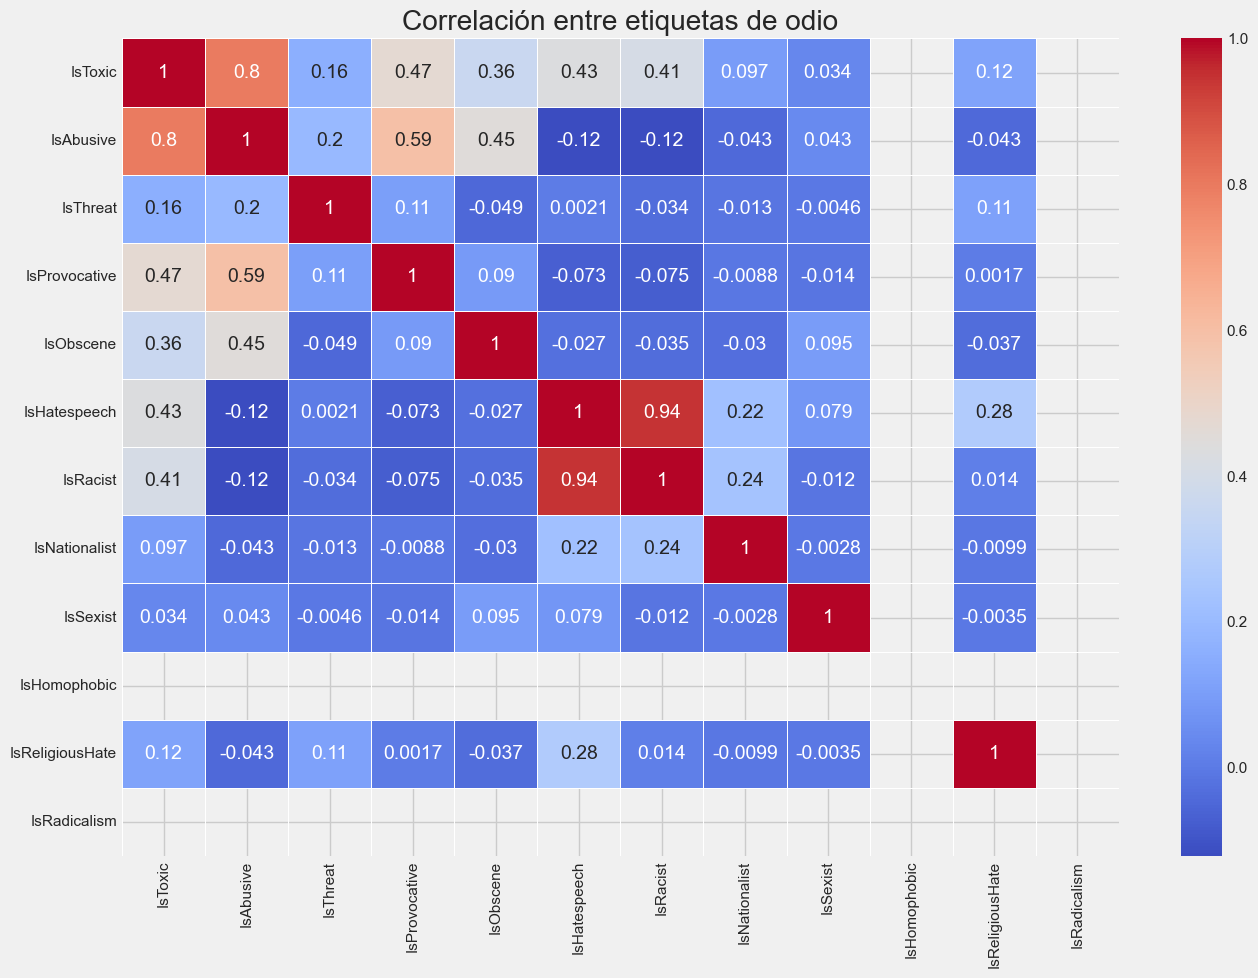

In [4]:
# Lista de etiquetas de interés
hate_labels = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 
               'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 
               'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

# Distribución de cada etiqueta
label_counts = df[hate_labels].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=label_counts.values, y=label_counts.index, ax=ax)
ax.set_title('Distribución de etiquetas de odio')
ax.set_xlabel('Número de comentarios')
plt.tight_layout()
plt.show()

# Porcentaje de cada etiqueta
label_percentages = (df[hate_labels].mean() * 100).sort_values(ascending=False)
print("Porcentaje de comentarios por categoría:")
for label, percentage in label_percentages.items():
    print(f"{label}: {percentage:.2f}%")

# Correlación entre etiquetas
plt.figure(figsize=(14, 10))
correlation_matrix = df[hate_labels].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre etiquetas de odio')
plt.tight_layout()
plt.show()

## 5. Análisis de Comentarios por Categoría

Ejemplos de comentarios clasificados como IsToxic (462 totales):
1. What's with all the dislikes? White people are that offended? You thought racism wasn't an issue anymore....think again
2. Remember,the looting(stealing) by the blacks is purely and only to gain free goods.All in the name of Mike Brown.Yea right.It's an excuse to steal-pure and simple.A good ,concise introspective Steffan.Some folks live off grievance.This follows perfectly after the white guilt segment.Keep em rollin.
3. he can go back where he's from period big mouth MORON
4. finally a black person with a unbiased opinion. An incredibly high percentage of black lives are lost among themselves and only an extremely small fraction from police.  Black people need to take responsibility for their violence.
5. This guy an idiot, if that's the best you can do, you have lost already!!  WHAT A BOZO!!


Ejemplos de comentarios clasificados como IsAbusive (353 totales):
1. I hate basterds like this but I would have been funny 

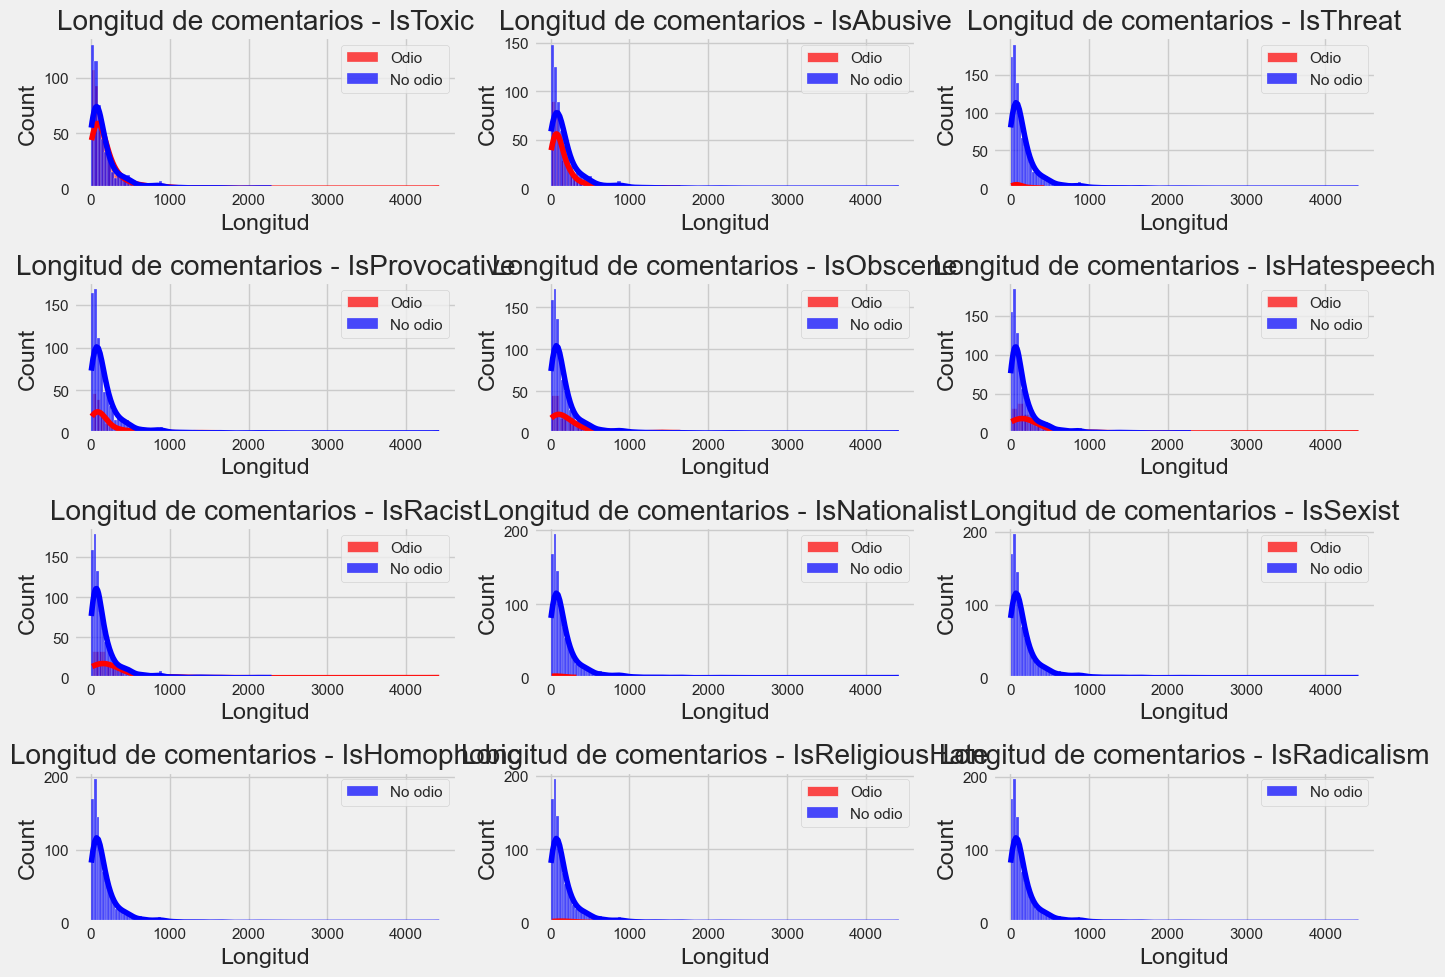

In [9]:
# Función para mostrar ejemplos de comentarios por categoría
def show_examples(category, n=5):
    category_examples = df[df[category] == True]['Text']
    available = len(category_examples)
    
    if available == 0:
        print(f"No hay ejemplos para la categoría {category}")
        print("\n")
        return
    
    # Tomar el mínimo entre n y la cantidad disponible
    samples_to_take = min(n, available)
    examples = category_examples.sample(samples_to_take).values
    
    print(f"Ejemplos de comentarios clasificados como {category} ({available} totales):")
    for i, example in enumerate(examples, 1):
        print(f"{i}. {example}")
    print("\n")

# Mostrar ejemplos para cada categoría
for category in hate_labels:
    show_examples(category)
    
# Distribución de longitud por categoría
plt.figure(figsize=(14, 10))
for i, category in enumerate(hate_labels, 1):
    plt.subplot(4, 3, i)
    
    # Verificar que haya al menos un ejemplo en cada categoría
    if df[df[category] == True].shape[0] > 0:
        sns.histplot(df[df[category] == True]['text_length'], 
                     label='Odio', alpha=0.7, color='red', kde=True)
    
    sns.histplot(df[df[category] == False]['text_length'], 
                 label='No odio', alpha=0.7, color='blue', kde=True)
    
    plt.title(f'Longitud de comentarios - {category}')
    plt.xlabel('Longitud')
    plt.legend()
plt.tight_layout()
plt.show()

## 6. Análisis de Vocabulario y Palabras Clave

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ibane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ibane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


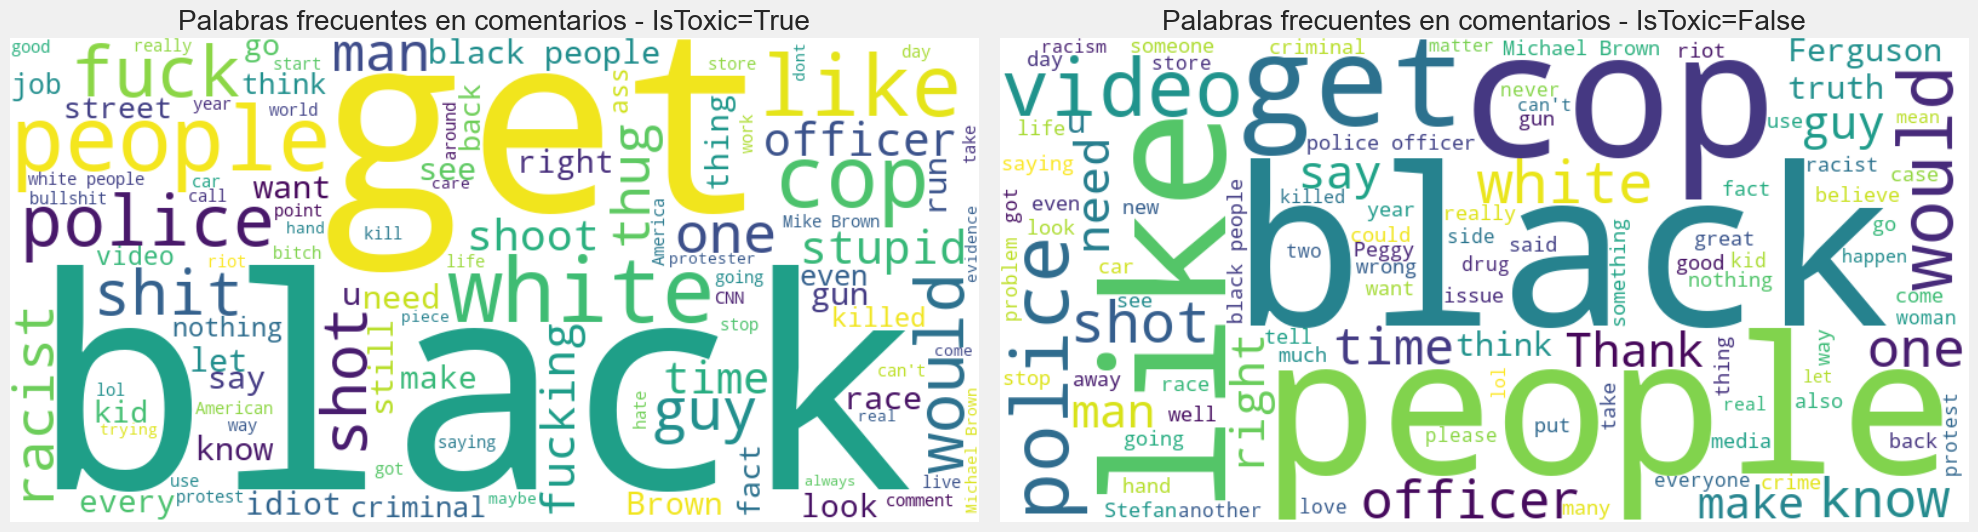

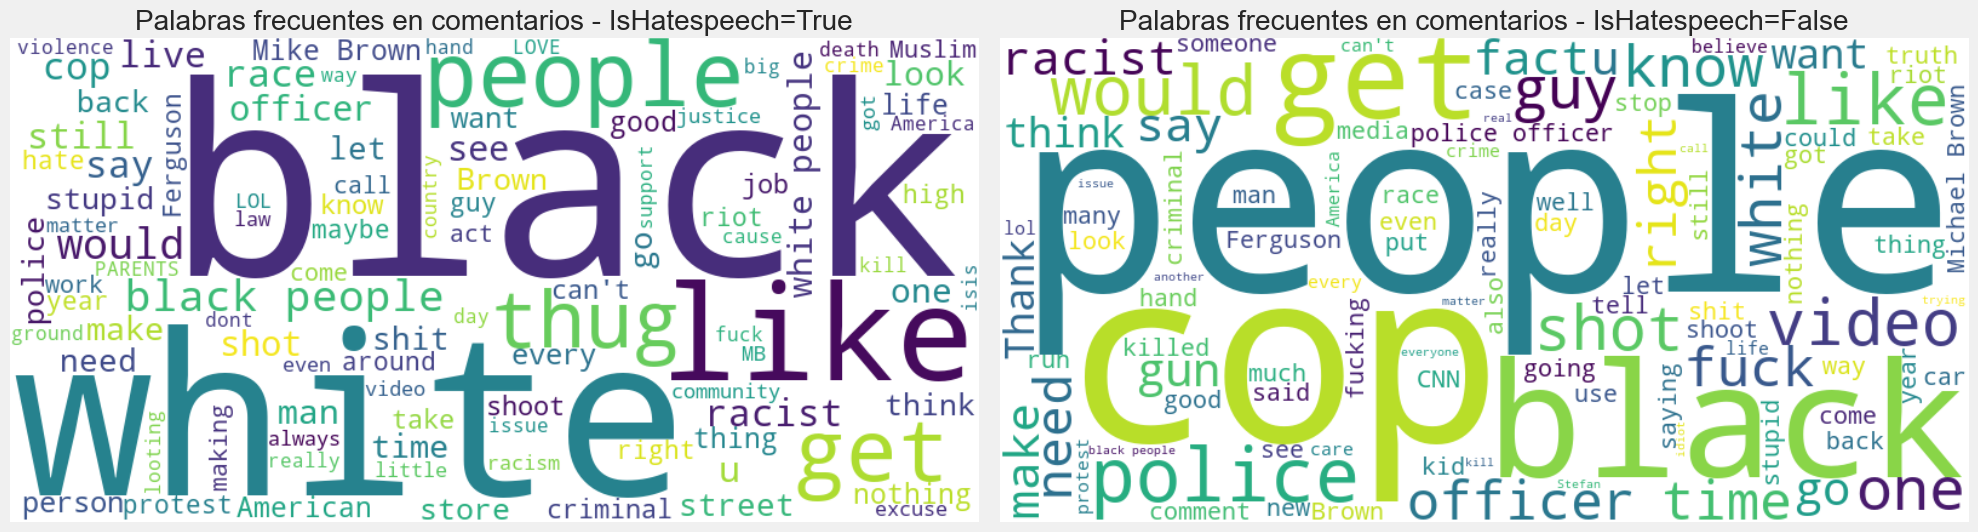

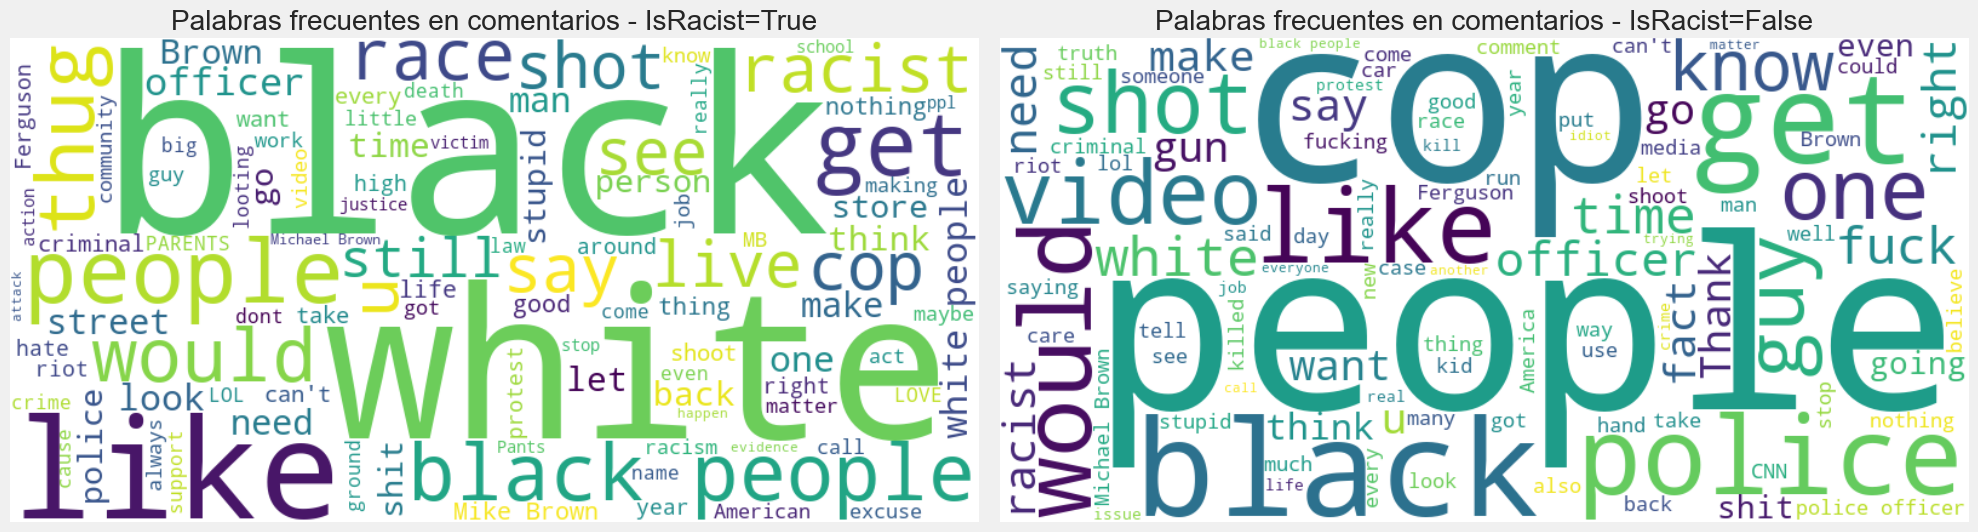

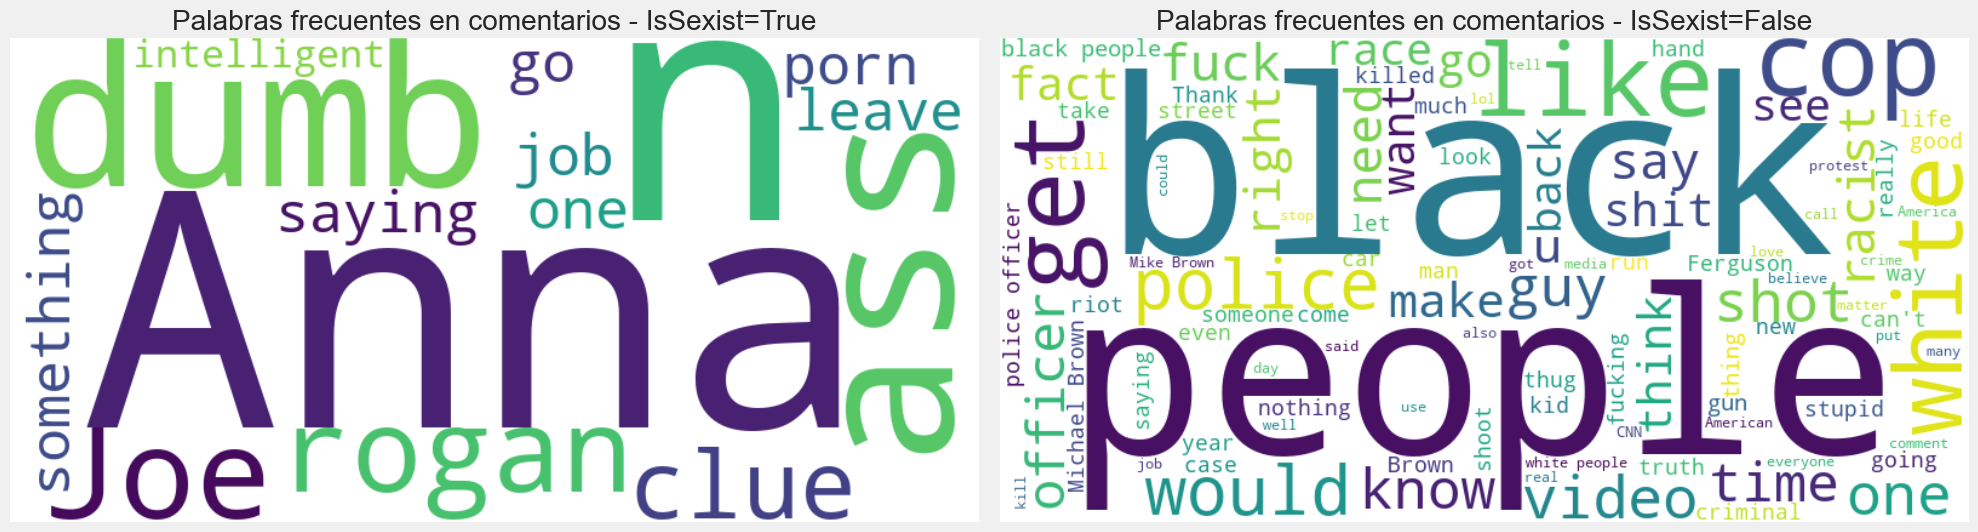

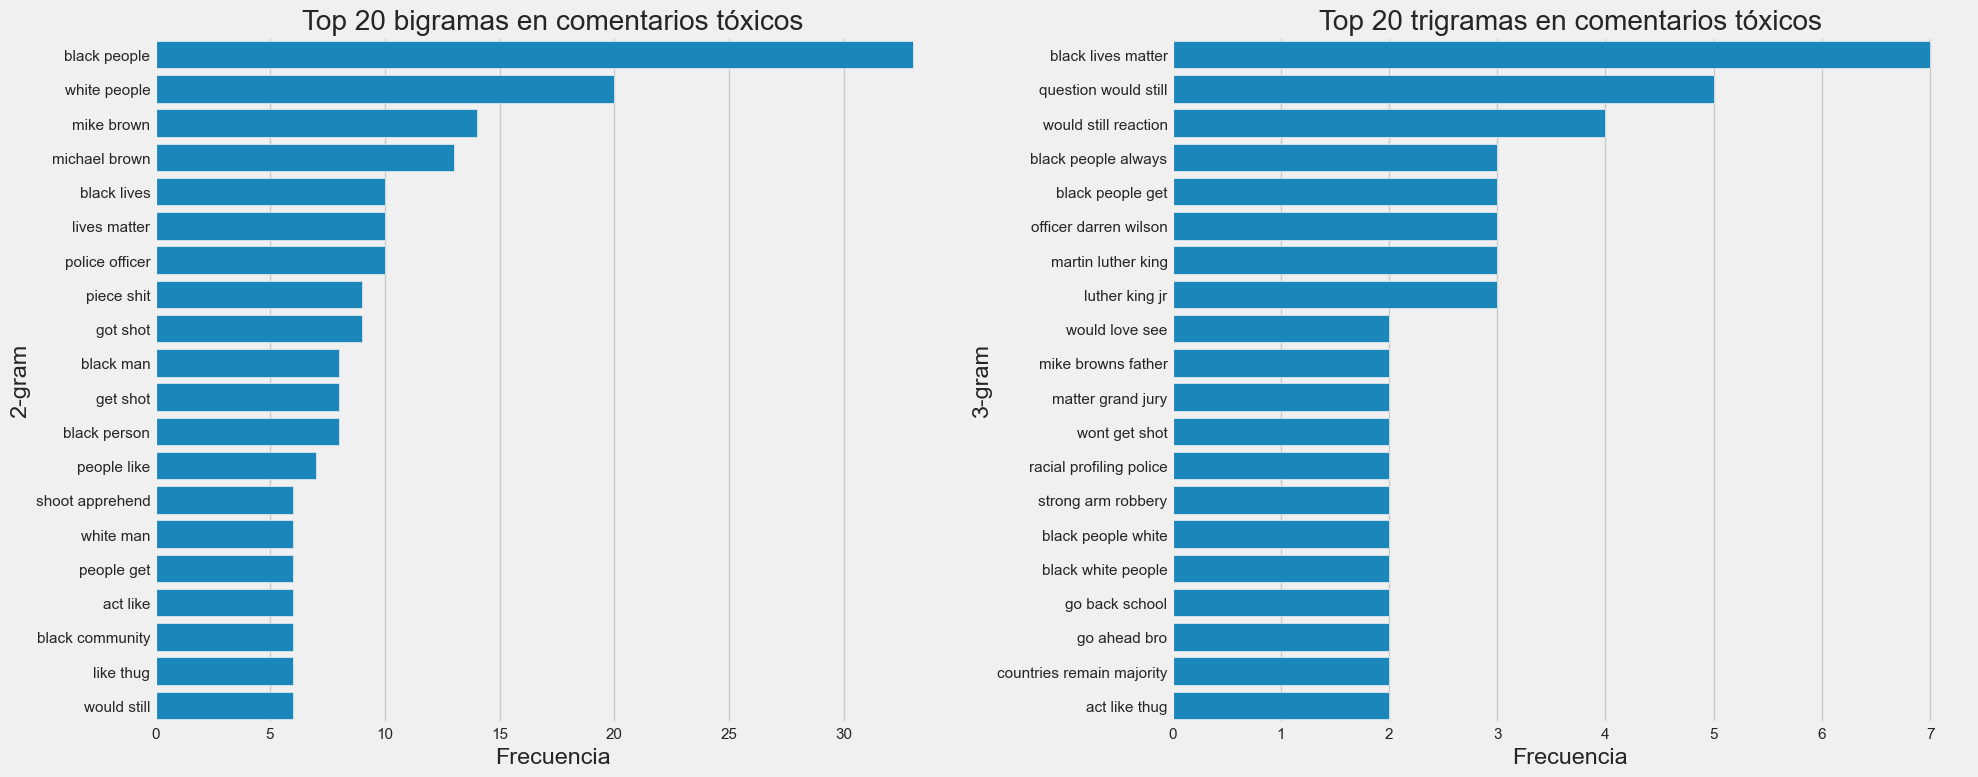

In [17]:
import nltk
from nltk.corpus import stopwords
# Descargar explícitamente todos los recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # Para etiquetado POS si se necesita
from collections import Counter
from wordcloud import WordCloud
import re  # Añadimos re para usar expresiones regulares en tokenización

# Función para generar nube de palabras por categoría
def generate_wordcloud(category):
    # Texto para comentarios categorizados como odio
    hate_text = ' '.join(df[df[category] == True]['Text'])
    # Texto para comentarios no categorizados como odio
    non_hate_text = ' '.join(df[df[category] == False]['Text'])
    
    # Configurar stopwords (ajustar según el idioma predominante del dataset)
    stop_words = set(stopwords.words('spanish') + stopwords.words('english'))
    
    # Generar nubes de palabras
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Nube para comentarios de odio
    wordcloud_hate = WordCloud(width=800, height=400, 
                               background_color='white',
                               stopwords=stop_words,
                               max_words=100).generate(hate_text)
    ax1.imshow(wordcloud_hate, interpolation='bilinear')
    ax1.set_title(f'Palabras frecuentes en comentarios - {category}=True')
    ax1.axis('off')
    
    # Nube para comentarios sin odio
    wordcloud_non_hate = WordCloud(width=800, height=400, 
                                  background_color='white', 
                                  stopwords=stop_words,
                                  max_words=100).generate(non_hate_text)
    ax2.imshow(wordcloud_non_hate, interpolation='bilinear')
    ax2.set_title(f'Palabras frecuentes en comentarios - {category}=False')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# Generar nubes de palabras para categorías principales
for category in ['IsToxic', 'IsHatespeech', 'IsRacist', 'IsSexist']:
    generate_wordcloud(category)

# Análisis de n-gramas frecuentes
from nltk import ngrams

def get_top_ngrams(corpus, n=2, top=20):
    # Tokenizar y obtener n-gramas
    stop_words = set(stopwords.words('spanish') + stopwords.words('english'))
    
    # Método alternativo de tokenización más robusto usando expresiones regulares
    # que no depende de recursos específicos de NLTK
    tokens = [word.lower() for word in re.findall(r'\b\w+\b', corpus.lower()) 
              if word.isalpha() and word.lower() not in stop_words]
    
    # Generar n-gramas
    n_grams = list(ngrams(tokens, n))
    
    # Contar frecuencias
    n_gram_freq = Counter(n_grams)
    
    # Convertir a dataframe para visualización
    n_gram_df = pd.DataFrame(n_gram_freq.most_common(top), 
                             columns=[f'{n}-gram', 'Frecuencia'])
    n_gram_df[f'{n}-gram'] = n_gram_df[f'{n}-gram'].apply(lambda x: ' '.join(x))
    
    return n_gram_df

# Analizar bigramas y trigramas en comentarios tóxicos
toxic_text = ' '.join(df[df['IsToxic'] == True]['Text'])

toxic_bigrams = get_top_ngrams(toxic_text, n=2)
toxic_trigrams = get_top_ngrams(toxic_text, n=3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='Frecuencia', y='2-gram', data=toxic_bigrams, ax=ax1)
ax1.set_title('Top 20 bigramas en comentarios tóxicos')

sns.barplot(x='Frecuencia', y='3-gram', data=toxic_trigrams, ax=ax2)
ax2.set_title('Top 20 trigramas en comentarios tóxicos')

plt.tight_layout()
plt.show()



## 7. Preprocesamiento del Texto

In [18]:
import re
import spacy

# Cargar modelos de spaCy
nlp_es = spacy.load('es_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

# Función para detectar idioma (simplificada)
def detect_language(text):
    # Este es un enfoque simple, podríamos usar langdetect para más precisión
    # Retorna 'es' para español, 'en' para inglés, 'unknown' para otros casos
    # Esta implementación básica examina las stopwords presentes
    es_stops = set(stopwords.words('spanish'))
    en_stops = set(stopwords.words('english'))
    
    words = set(text.lower().split())
    es_count = len(words.intersection(es_stops))
    en_count = len(words.intersection(en_stops))
    
    if es_count > en_count:
        return 'es'
    elif en_count > 0:
        return 'en'
    else:
        return 'unknown'

# Función para limpiar y normalizar texto
def preprocess_text(text, lang='es'):
    if pd.isna(text):
        return ""
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' URL ', text)
    
    # Eliminar menciones (@usuario)
    text = re.sub(r'@\w+', ' MENTION ', text)
    
    # Normalizar emojis (simplificado)
    text = re.sub(r'[^\w\s,.]', ' EMOJI ', text)
    
    # Eliminar caracteres no alfanuméricos y espacios múltiples
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Procesamiento con spaCy según idioma detectado
    if lang == 'es':
        doc = nlp_es(text)
    else:
        doc = nlp_en(text)
    
    # Lematización y filtrado de stopwords
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    
    return " ".join(tokens)

# Aplicar preprocesamiento
# Primero detectar idioma (para dataset más grande, usar muestra)
df['language'] = df['Text'].apply(detect_language)
print("Distribución de idiomas detectados:")
print(df['language'].value_counts())

# Luego preprocesar según idioma detectado
df['processed_text'] = df.apply(
    lambda row: preprocess_text(row['Text'], row['language']), axis=1
)

# Verificar resultados
pd.set_option('display.max_colwidth', 100)
sample_texts = df[['Text', 'processed_text']].sample(10)
sample_texts

Distribución de idiomas detectados:
language
en         945
unknown     54
es           1
Name: count, dtype: int64


,Text,processed_text
646,One mustang needed in this situation lol💀💀,mustang need situation lol EMOJI EMOJI
701,I understand the point black lives do matter but blocking off traffic like that like WTH is that...,understand point black life matter block traffic like like wth go to people need place hospital ...
714,I'm not informed 100% about what exactly is going on but that was fucked up! I'm trying to find ...,EMOJI m inform EMOJI exactly go fuck EMOJI EMOJI m try find reliable resource understand EMOJI t...
594,"I'm just upset about the court ruling, if ur that upset to close a whole freeway, just go to the...",EMOJI m upset court ruling ur upset close freeway main cause airline ticket america freedom spee...
809,Wake up Black People.,wake black people
176,Protest was converted into riot because majority of people wanted it. Don't be fooled by politic...,protest convert riot majority people want don EMOJI t fool politician play game common man care ...
814,She said I need new parts for my Harley lol,say need new part harley lol
164,"Bassem Masri is an uneducated idiot. Just listen the words coming out of his mouth, he sounds li...",bassem masri uneducated idiot listen word come mouth sound like stupid little kid sorry grow fuc...
816,"Peggy, I tip my hat to you.",peggy tip hat
13,We all know with the chimpers there is no compassion in their mud pumping hearts.,know chimper compassion mud pump heart


## 8. División del Dataset

In [19]:
from sklearn.model_selection import train_test_split

# Definir features (X) y etiquetas (y)
X = df['processed_text']
y = df[hate_labels]

# Primera división: train+validation vs test (80/20)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y['IsToxic']
)

# Segunda división: train vs validation (80/20 del 80% original = 64/16)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val['IsToxic']
)

print(f"Tamaño conjunto de entrenamiento: {len(X_train)} ({len(X_train)/len(X):.1%})")
print(f"Tamaño conjunto de validación: {len(X_val)} ({len(X_val)/len(X):.1%})")
print(f"Tamaño conjunto de prueba: {len(X_test)} ({len(X_test)/len(X):.1%})")

# Verificar distribución de etiquetas en cada conjunto
def check_distribution(dataset_name, y_data):
    print(f"\nDistribución de etiquetas en conjunto {dataset_name}:")
    for label in hate_labels:
        percentage = y_data[label].mean() * 100
        print(f"{label}: {percentage:.2f}%")

check_distribution("COMPLETO", y)
check_distribution("ENTRENAMIENTO", y_train)
check_distribution("VALIDACIÓN", y_val)
check_distribution("PRUEBA", y_test)

Tamaño conjunto de entrenamiento: 640 (64.0%)
Tamaño conjunto de validación: 160 (16.0%)
Tamaño conjunto de prueba: 200 (20.0%)

Distribución de etiquetas en conjunto COMPLETO:
IsToxic: 46.20%
IsAbusive: 35.30%
IsThreat: 2.10%
IsProvocative: 16.10%
IsObscene: 10.00%
IsHatespeech: 13.80%
IsRacist: 12.50%
IsNationalist: 0.80%
IsSexist: 0.10%
IsHomophobic: 0.00%
IsReligiousHate: 1.20%
IsRadicalism: 0.00%

Distribución de etiquetas en conjunto ENTRENAMIENTO:
IsToxic: 46.25%
IsAbusive: 35.16%
IsThreat: 1.88%
IsProvocative: 15.94%
IsObscene: 9.69%
IsHatespeech: 14.53%
IsRacist: 13.44%
IsNationalist: 0.94%
IsSexist: 0.16%
IsHomophobic: 0.00%
IsReligiousHate: 0.94%
IsRadicalism: 0.00%

Distribución de etiquetas en conjunto VALIDACIÓN:
IsToxic: 46.25%
IsAbusive: 35.62%
IsThreat: 1.25%
IsProvocative: 19.38%
IsObscene: 14.37%
IsHatespeech: 13.12%
IsRacist: 11.88%
IsNationalist: 0.00%
IsSexist: 0.00%
IsHomophobic: 0.00%
IsReligiousHate: 0.62%
IsRadicalism: 0.00%

Distribución de etiquetas en conju